# **GRAFOS**

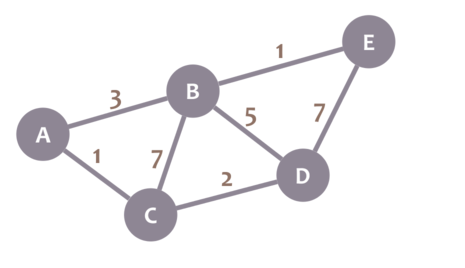

In [16]:
class PersonalizedException(Exception):
    """
    Excepción personalizada para lanzar y provocar casque
    """
    def __init__(self, *args: object) -> None:
        super().__init__(*args)


class Grafo():
    def __init__(self) -> None:
        self.nodos = {}
    
    def add_node(self,nodo,**kargs) -> None:
        if nodo in self.nodos: raise PersonalizedException("YA EXISTE EL NODO")
        self.nodos[nodo] = {"edges":{}}
        for k,v in kargs.items(): self.nodos[nodo][k]=v
            
    def remove_node(self,nodo) -> None:
        if nodo not in self.nodos: raise PersonalizedException("NO SE ENCONTRÓ EL NODO A BORRAR")
        for n in self.nodos[nodo]["edges"]:
            self.nodos[n]["edges"].pop(nodo)
        self.nodos.pop(nodo)

    def add_edge(self,nodo1,nodo2,**kargs) -> None :
        if nodo1 not in self.nodos or nodo2 not in self.nodos: raise PersonalizedException("ERROR UNO DE LOS BORDES NO ENCONTRADOS")
        self.nodos[nodo1]["edges"][nodo2]=kargs
        self.nodos[nodo2]["edges"][nodo1]=kargs

    def remove_edge(self,nodo1,nodo2):
        if nodo1 not in self.nodos or nodo2 not in self.nodos: raise PersonalizedException("BORDE NO ENCONTRADO")
        self.nodos[nodo1]["edges"].pop(nodo2, None)
        self.nodos[nodo2]["edges"].pop(nodo1, None)

    def set_node_atributtes(self,nodo,**kargs):
        for k,v in kargs.items():
            self.nodos[nodo][k]=v

    def get_node_attributtes(self,nodo,attributte,default=None):
        return self.nodos[nodo].get(attributte,default)
    
    def set_edge_atributtes(self,nodo1,nodo2,**kargs):
        for k,v in kargs.items():
            self.nodos[nodo1]["edges"][nodo2][k]=v

    def get_edge_atributtes(self,nodo1,nodo2,attributte,default=None):
        return self.nodos[nodo1]["edges"][nodo2].get(attributte,default)

In [20]:
import pprint


g = Grafo()
try:
    g.add_node("A")
    g.add_node("B")
    g.add_node("C")
    g.add_node("D")
    g.add_node("E")
    g.add_edge("A", "B", coste=3)
    g.add_edge("A", "C", coste=1)
    g.add_edge("B", "C", coste=7)
    g.add_edge("C", "D", coste=2)
    g.add_edge("B", "D", coste=5)
    g.add_edge("B", "E", coste=1)
    g.add_edge("D", "E", coste=7)
    print(g.get_node_attributtes("A","edges",True))
    #g.remove_node("D")
    #g.remove_edge("A", "B")
    print("")
    g.set_edge_atributtes("A","B",prueba=5)
    g.get_edge_atributtes("A","B","prueba")
    pprint.pprint(g.nodos)
except PersonalizedException as e:
    print(f"\033[91m{e}\033[0m")

{'B': {'coste': 3}, 'C': {'coste': 1}}

{'A': {'edges': {'B': {'coste': 3, 'prueba': 5}, 'C': {'coste': 1}}},
 'B': {'edges': {'A': {'coste': 3, 'prueba': 5},
                 'C': {'coste': 7},
                 'D': {'coste': 5},
                 'E': {'coste': 1}}},
 'C': {'edges': {'A': {'coste': 1}, 'B': {'coste': 7}, 'D': {'coste': 2}}},
 'D': {'edges': {'B': {'coste': 5}, 'C': {'coste': 2}, 'E': {'coste': 7}}},
 'E': {'edges': {'B': {'coste': 1}, 'D': {'coste': 7}}}}
